In [230]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from src.features.conferences import ConferenceFeatures
from src.features.coaches import CoachFeatures
from src.features.seeds import SeedFeatures
from src.utils import load_data_template
from src.features.games_detailed import GameDetailedFeatures
from src.features.games import GameFeatures
from src.features.rankings import RankingFeatures
from src.features.events import EventFeatures

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
data = load_data_template(season=False)
data.dropna(subset=['a_win'], inplace=True)
seed_feat = SeedFeatures()
data = seed_feat.per_team_wrapper(data, seed_feat.team_seeds, per_game=False, per_day=False, combine='subtract')
print('-- Seeds loaded --')
print(data.shape)
coach_feat = CoachFeatures(default_lags=0)
data = coach_feat.per_team_wrapper(data, coach_feat.coach_func, per_game=False, per_day=False)
print('-- Coach loaded --')
print(data.shape)
conf_feat = ConferenceFeatures(default_lags=0)
data = conf_feat.per_team_wrapper(data, conf_feat.conference_games, per_game=False, per_day=False)
data = data.fillna(0)
print('-- Conferences loaded --')
print(data.shape)
event_feat = EventFeatures(default_lags=1)
data = event_feat.per_team_wrapper(data, event_feat.steals_in_season)
data = data.fillna(0)
print('-- Events loaded --')
game_feat = GameFeatures()
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_in_season)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_in_tourney)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_against_opponent, per_game=True)
data = game_feat.per_team_wrapper(data, game_feat.games_won_in_tourney_against_opponent, per_game=True)
data = data.fillna(0)
print(data.shape)
print('-- Game Features loaded --')
game_detail_feat = GameDetailedFeatures(default_lags=2)
data = game_detail_feat.per_team_wrapper(data, game_detail_feat.detail_features_by_game, per_day=True)
data = data.fillna(0)
print(data.shape)
print('-- Game Detailed Features loaded --')
rank_feat = RankingFeatures(default_lags=0)
data = rank_feat.per_team_wrapper(data, rank_feat.pca_variables_rankings, per_game=False, per_day=False)
data = rank_feat.per_team_wrapper(data, rank_feat.elos_season, per_game=False, per_day=False)
print('-- Rankings loaded --')
data = data.fillna(0)
print(data.shape)
data.sample()

-- Seeds loaded --
(2117, 8)
-- Coach loaded --
(2117, 10)
-- Conferences loaded --
(2117, 12)
-- Events loaded --
(2117, 40)
-- Game Features loaded --
(2117, 92)
-- Game Detailed Features loaded --
-- Rankings loaded --
(2117, 134)


,Season,team_a,team_b,in_target,game_set,a_win,DayNum,seed_combined,coach_team_a,coach_team_b,...,PC13_team_b,PC14_team_b,PC15_team_b,PC16_team_b,PC17_team_b,PC18_team_b,PC19_team_b,PC20_team_b,elos_season_team_a,elos_season_team_b
10811,2011,1345,1433,False,0,False,139,-8,879,1190,...,-0.456439,-0.142267,-1.545356,0.046853,-0.490454,-0.280901,0.19394,0.116217,1944.094834,1726.520008


In [232]:
dataframe = data

In [233]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def train_test_split_year(data, year):
    
    X_train = data.drop(['Season','team_a','team_b','a_win','in_target','DayNum'], axis=1)[data.Season < year] 
    X_test = data.drop(['Season','team_a','team_b','a_win','in_target','DayNum'], axis=1)[data.Season == year]
    y_train = data[['a_win']][data.Season < year] 
    y_test =  data[['a_win']][data.Season == year]
    return X_train, X_test, y_train, y_test

Year 2000 logloss: 4.934161681649476
Year 2000 accuracy: 0.8571428571428571
             precision    recall  f1-score   support

team_a_wins       0.85      0.88      0.87        33
team_b_wins       0.86      0.83      0.85        30

avg / total       0.86      0.86      0.86        63



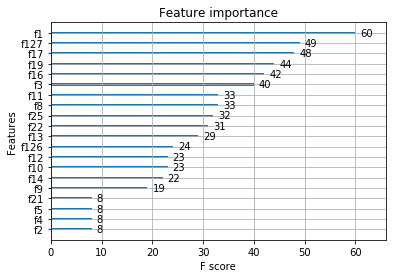

Year 2001 logloss: 3.777716149322897
Year 2001 accuracy: 0.890625
             precision    recall  f1-score   support

team_a_wins       0.87      0.90      0.89        30
team_b_wins       0.91      0.88      0.90        34

avg / total       0.89      0.89      0.89        64



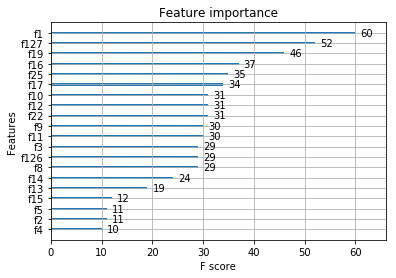

Year 2002 logloss: 6.476070548885141
Year 2002 accuracy: 0.8125
             precision    recall  f1-score   support

team_a_wins       0.78      0.88      0.82        32
team_b_wins       0.86      0.75      0.80        32

avg / total       0.82      0.81      0.81        64



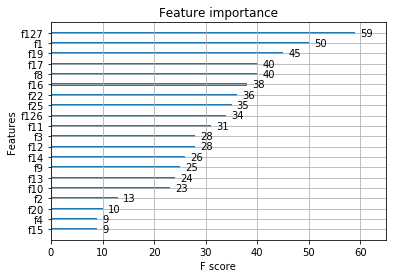

Year 2003 logloss: 4.317397024203224
Year 2003 accuracy: 0.875
             precision    recall  f1-score   support

team_a_wins       0.89      0.89      0.89        36
team_b_wins       0.86      0.86      0.86        28

avg / total       0.88      0.88      0.88        64



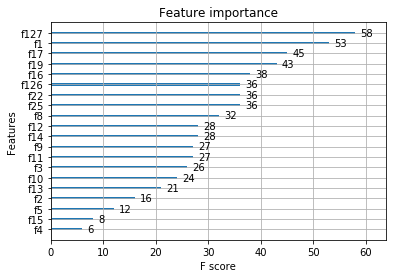

Year 2004 logloss: 3.777728643032744
Year 2004 accuracy: 0.890625
             precision    recall  f1-score   support

team_a_wins       0.89      0.86      0.87        28
team_b_wins       0.89      0.92      0.90        36

avg / total       0.89      0.89      0.89        64



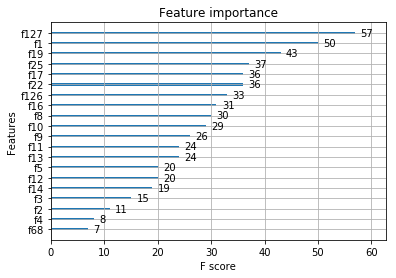

Year 2005 logloss: 5.396808748803263
Year 2005 accuracy: 0.84375
             precision    recall  f1-score   support

team_a_wins       1.00      0.70      0.82        33
team_b_wins       0.76      1.00      0.86        31

avg / total       0.88      0.84      0.84        64



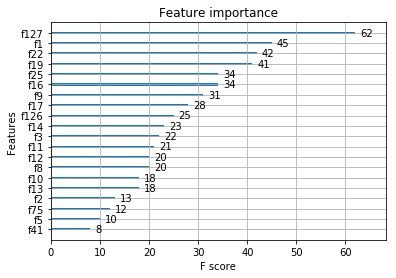

Year 2006 logloss: 2.1586985121016125
Year 2006 accuracy: 0.9375
             precision    recall  f1-score   support

team_a_wins       0.94      0.94      0.94        32
team_b_wins       0.94      0.94      0.94        32

avg / total       0.94      0.94      0.94        64



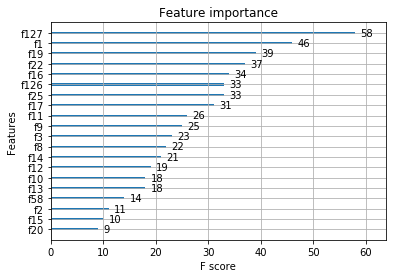

Year 2007 logloss: 1.6190051435114392
Year 2007 accuracy: 0.953125
             precision    recall  f1-score   support

team_a_wins       0.92      1.00      0.96        34
team_b_wins       1.00      0.90      0.95        30

avg / total       0.96      0.95      0.95        64



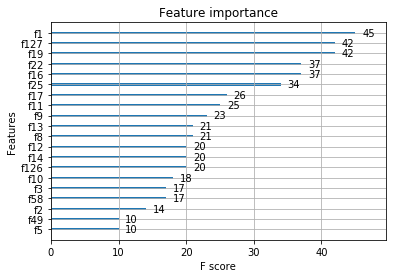

Year 2008 logloss: 2.158698512101612
Year 2008 accuracy: 0.9375
             precision    recall  f1-score   support

team_a_wins       0.94      0.94      0.94        35
team_b_wins       0.93      0.93      0.93        29

avg / total       0.94      0.94      0.94        64



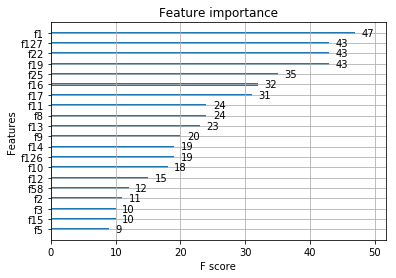

Year 2009 logloss: 0.5396808748803271
Year 2009 accuracy: 0.984375
             precision    recall  f1-score   support

team_a_wins       1.00      0.97      0.99        40
team_b_wins       0.96      1.00      0.98        24

avg / total       0.98      0.98      0.98        64



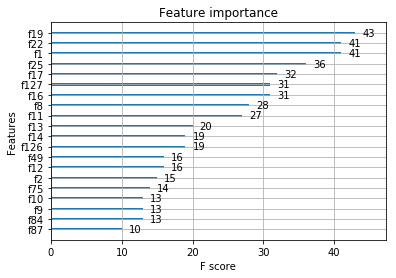

Year 2010 logloss: 2.698379386981938
Year 2010 accuracy: 0.921875
             precision    recall  f1-score   support

team_a_wins       0.94      0.91      0.92        32
team_b_wins       0.91      0.94      0.92        32

avg / total       0.92      0.92      0.92        64



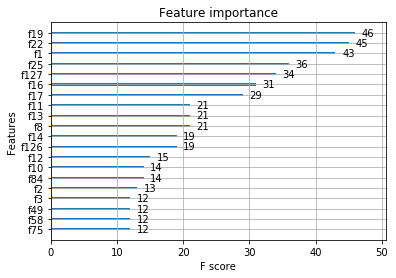

Year 2011 logloss: 3.093060554653056
Year 2011 accuracy: 0.9104477611940298
             precision    recall  f1-score   support

team_a_wins       0.90      0.90      0.90        29
team_b_wins       0.92      0.92      0.92        38

avg / total       0.91      0.91      0.91        67



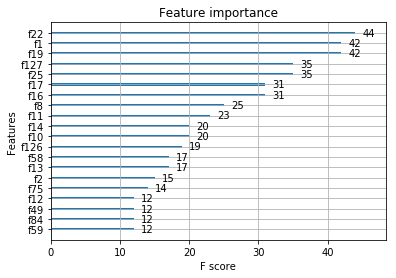

Year 2012 logloss: 1.0310321191743552
Year 2012 accuracy: 0.9701492537313433
             precision    recall  f1-score   support

team_a_wins       1.00      0.94      0.97        32
team_b_wins       0.95      1.00      0.97        35

avg / total       0.97      0.97      0.97        67



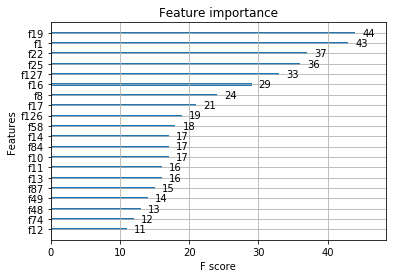

Year 2013 logloss: 3.6085527456602278
Year 2013 accuracy: 0.8955223880597015
             precision    recall  f1-score   support

team_a_wins       0.86      0.94      0.90        34
team_b_wins       0.93      0.85      0.89        33

avg / total       0.90      0.90      0.90        67



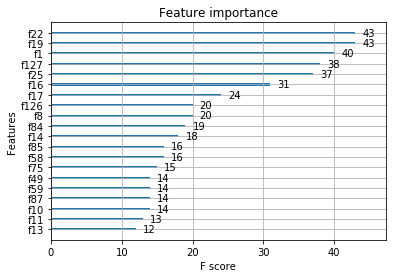

Year 2014 logloss: 2.0620165011886984
Year 2014 accuracy: 0.9402985074626866
             precision    recall  f1-score   support

team_a_wins       0.88      1.00      0.94        29
team_b_wins       1.00      0.89      0.94        38

avg / total       0.95      0.94      0.94        67



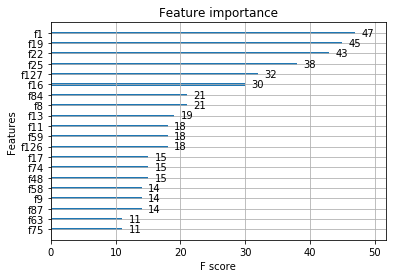

Year 2015 logloss: 1.0310321191743554
Year 2015 accuracy: 0.9701492537313433
             precision    recall  f1-score   support

team_a_wins       1.00      0.94      0.97        36
team_b_wins       0.94      1.00      0.97        31

avg / total       0.97      0.97      0.97        67



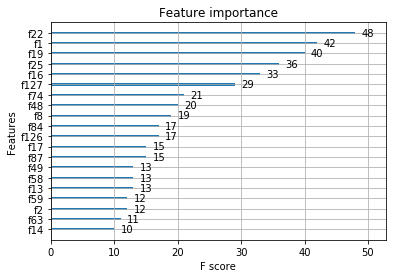

Year 2016 logloss: 0.5155041252971754
Year 2016 accuracy: 0.9850746268656716
             precision    recall  f1-score   support

team_a_wins       0.97      1.00      0.99        38
team_b_wins       1.00      0.97      0.98        29

avg / total       0.99      0.99      0.99        67



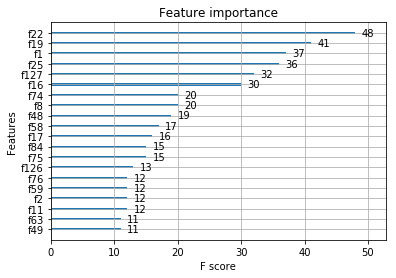

Year 2017 logloss: 2.5775802979358873
Year 2017 accuracy: 0.9253731343283582
             precision    recall  f1-score   support

team_a_wins       1.00      0.85      0.92        34
team_b_wins       0.87      1.00      0.93        33

avg / total       0.94      0.93      0.93        67



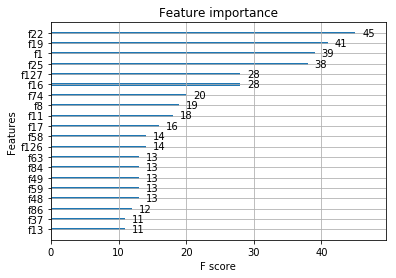

Logloss Mean: 2.876284649364302 (1.6510768498124595)
Accuracy Mean: 0.9167240434731107 (0.04780298868139892)


In [234]:
accuracies = []
loglosses = []
target_names = ['team_a_wins', 'team_b_wins']

for year in np.arange(2000,2018):
    X_train, X_test, y_train, y_test = train_test_split_year(data, year)
    xgb = XGBClassifier()
    xgb.fit(X_train.values, y_train.values.reshape(-1))
    preds = xgb.predict(X_test.values)
    logloss = log_loss(y_test.values.reshape(-1), preds)
    accuracy = accuracy_score(y_test.values.reshape(-1), preds)
    accuracies.append(accuracy)
    loglosses.append(logloss)
    print('Year {} logloss: {}'.format(year, logloss))
    print('Year {} accuracy: {}'.format(year, accuracy))
    target_names = ['team_a_wins', 'team_b_wins']
    print(classification_report(y_test, preds, target_names=target_names))
    plt.figure(figsize=(20,8))
    plot_importance(xgb, max_num_features=20)
    plt.show()
    
print('Logloss Mean: {} ({})'.format(np.mean(loglosses), np.std(loglosses)))
print('Accuracy Mean: {} ({})'.format(np.mean(accuracies), np.std(accuracies)))

In [235]:
pd.Series(X_train.columns)

0                                               game_set
1                                          seed_combined
2                                           coach_team_a
3                                           coach_team_b
4                                      conference_team_a
5                                      conference_team_b
6                          steals_in_season_team_a_lag-1
7                          steals_in_season_team_b_lag-1
8                        last_games_won_in_season_team_a
9                  last_games_won_in_season_team_a_lag-1
10                 last_games_won_in_season_team_a_lag-2
11                 last_games_won_in_season_team_a_lag-3
12                       last_games_won_in_season_team_b
13                 last_games_won_in_season_team_b_lag-1
14                 last_games_won_in_season_team_b_lag-2
15                 last_games_won_in_season_team_b_lag-3
16                last_games_won_in_tourney_team_a_lag-1
17                last_games_wo

---

---

In [249]:
data = pd.read_csv('data/SampleSubmissionStage2_SampleTourney2018.csv')
data['Season'] = data['ID'].apply(lambda s: s[:4]).astype(int)
data['team_a'] = data['ID'].apply(lambda s: s[5:9]).astype(str)
data['team_b'] = data['ID'].apply(lambda s: s[10:]).astype(str)
data['Season'] = data['Season'].astype(int)
data['a_win'] = False
data = seed_feat.per_team_wrapper(data, seed_feat.team_seeds, per_game=False, per_day=False, combine='subtract')
print('-- Seeds loaded --')
print(data.shape)
coach_feat = CoachFeatures(default_lags=0)
data = coach_feat.per_team_wrapper(data, coach_feat.coach_func, per_game=False, per_day=False)
print('-- Coach loaded --')
print(data.shape)
conf_feat = ConferenceFeatures(default_lags=0)
data = conf_feat.per_team_wrapper(data, conf_feat.conference_games, per_game=False, per_day=False)
data = data.fillna(0)
print('-- Conferences loaded --')
print(data.shape)
event_feat = EventFeatures(default_lags=1)
data = event_feat.per_team_wrapper(data, event_feat.steals_in_season)
data = data.fillna(0)
print('-- Events loaded --')
game_feat = GameFeatures()
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_in_season)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_in_tourney)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_against_opponent, per_game=True, per_day=False)
data = game_feat.per_team_wrapper(data, game_feat.games_won_in_tourney_against_opponent, per_game=True, per_day=False)
data = data.fillna(0)
print(data.shape)
print('-- Game Features loaded --')
game_detail_feat = GameDetailedFeatures(default_lags=2)
# data = game_detail_feat.per_team_wrapper(data, game_detail_feat.detail_features_by_game, per_day=True)
# data = data.fillna(0)
print(data.shape)
# print('-- Game Detailed Features loaded --')
rank_feat = RankingFeatures(default_lags=0)
data = rank_feat.per_team_wrapper(data, rank_feat.pca_variables_rankings, per_game=False, per_day=False)
data = rank_feat.per_team_wrapper(data, rank_feat.elos_season, per_game=False, per_day=False)
print('-- Rankings loaded --')
data = data.fillna(0)
print(data.shape)
data.sample()

-- Seeds loaded --
(2278, 7)
-- Coach loaded --
(2278, 9)
-- Conferences loaded --
(2278, 11)
-- Events loaded --
(2278, 39)
-- Game Features loaded --
(2278, 39)
-- Rankings loaded --
(2278, 81)


,ID,Pred,Season,team_a,team_b,a_win,seed_combined,coach_team_a,coach_team_b,conference_team_a,...,PC13_team_b,PC14_team_b,PC15_team_b,PC16_team_b,PC17_team_b,PC18_team_b,PC19_team_b,PC20_team_b,elos_season_team_a,elos_season_team_b
1515,2018_1276_1366,0.5,2018,1276,1366,False,0.0,679,501,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
data = pd.concat([dataframe, data])
print(data.shape)
data.describe()

(8629, 136)


,Ast_game_team_a_lag-1,Ast_game_team_a_lag-2,Ast_game_team_b_lag-1,Ast_game_team_b_lag-2,Blk_game_team_a_lag-1,Blk_game_team_a_lag-2,Blk_game_team_b_lag-1,Blk_game_team_b_lag-2,DR_game_team_a_lag-1,DR_game_team_a_lag-2,...,last_games_won_in_tourney_team_b_lag-3,last_games_won_in_year_against_opponent_team_a_lag-1,last_games_won_in_year_against_opponent_team_a_lag-2,last_games_won_in_year_against_opponent_team_a_lag-3,last_games_won_in_year_against_opponent_team_b_lag-1,last_games_won_in_year_against_opponent_team_b_lag-2,last_games_won_in_year_against_opponent_team_b_lag-3,seed_combined,steals_in_season_team_a_lag-1,steals_in_season_team_b_lag-1
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,8629.000000,8629.000000,8629.000000,8629.000000,8629.000000,8629.000000,8629.000000,8629.000000,8629.0,8629.0
mean,5.916391,6.135097,6.008030,6.168635,1.671233,1.709495,1.632026,1.609825,10.873878,10.769013,...,0.737049,0.125855,0.062232,0.033376,0.117163,0.053193,0.026423,-0.042067,0.0,0.0
std,6.942788,7.184740,7.046221,7.210452,2.394006,2.426852,2.340437,2.315410,12.174622,12.061889,...,1.263791,0.350065,0.271413,0.190888,0.335393,0.235025,0.166774,6.473330,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,12.000000,12.000000,12.000000,13.000000,3.000000,3.000000,3.000000,3.000000,23.000000,22.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,0.0
max,29.000000,29.000000,29.000000,28.000000,16.000000,16.000000,14.000000,14.000000,42.000000,41.000000,...,6.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,15.000000,0.0,0.0


In [263]:
from src.utils import load_target_sample

load_target_sample()

,Season,team_a,team_b,in_target,game_set
ID,,,,,
2014_1107_1110,2014,1107,1110,True,ncaa
2014_1107_1112,2014,1107,1112,True,ncaa
2014_1107_1113,2014,1107,1113,True,ncaa
2014_1107_1124,2014,1107,1124,True,ncaa
2014_1107_1140,2014,1107,1140,True,ncaa
2014_1107_1142,2014,1107,1142,True,ncaa
2014_1107_1153,2014,1107,1153,True,ncaa
2014_1107_1157,2014,1107,1157,True,ncaa
2014_1107_1160,2014,1107,1160,True,ncaa


In [264]:
data['in_target'], data['DayNum'] = True, 0
X_train, X_test, y_train, y_test = train_test_split_year(data, 2018)
xgb = XGBClassifier()
xgb.fit(X_train.values, y_train.values.reshape(-1))
preds = xgb.predict(X_test.values)
print(preds)

[ True  True  True ...,  True  True  True]


In [265]:
pd.DataFrame(preds)

,0
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True
